# Example for dict

In [1]:
import json

example_embedding_dict = {
    "1234" : { # hash from dat_id + URL
      "pat_id" : "ID",
      "bucket_url" : "gs://",
      "origin_ds" : "brats-upenn",
      "diagnose": "glioblastom",
      "embeddings" : {
          "slice_id" : 56,
          "RESNET50" : {
                "emb_t1" : [123,12,12,223],
                "emb_t1_contrast" : [123,12,12,223],
                "emb_t2" : [123,12,12,223],
                "emb_t2_flair" : [123,12,12,223],
                "seg_emb_t1" : [123,12,12,223],
                "seg_emb_t1_contrast" : [123,12,12,223],
                "seg_emb_t2" : [123,12,12,223],
                "seg_emb_t2_flair" : [123,12,12,223],
              },
          "VIT" : {
                "emb_t1" : [123,12,12,223],
                "emb_t1_contrast" : [123,12,12,223],
                "emb_t2" : [123,12,12,223],
                "emb_t2_flair" : [123,12,12,223],
                "seg_emb_t1" : [123,12,12,223],
                "seg_emb_t1_contrast" : [123,12,12,223],
                "seg_emb_t2" : [123,12,12,223],
                "seg_emb_t2_flair" : [123,12,12,223],
            }
        }
    },
    "321" : { # hash from dat_id + URL
      "pat_id" : "ID",
      "bucket_url" : "gs://",
      "origin_ds" : "brats-upenn",
      "diagnose": "glioblastom",
      "embeddings" : {
          "slice_id" : 56,
          "RESNET50" : {
                "emb_t1" : [123,12,12,223],
                "emb_t1_contrast" : [123,12,12,223],
                "emb_t2" : [123,12,12,223],
                "emb_flair" : [123,12,12,223],
                "seg_emb_t1" : [123,12,12,223],
                "seg_emb_t1_contrast" : [123,12,12,223],
                "seg_emb_t2" : [123,12,12,223],
                "seg_emb_t2_flair" : [123,12,12,223],
              },
          "VIT" : {
                "emb_t1" : [123,12,12,223],
                "emb_t1_contrast" : [123,12,12,223],
                "emb_t2" : [123,12,12,223],
                "emb_t2_flair" : [123,12,12,223],
                "seg_emb_t1" : [123,12,12,223],
                "seg_emb_t1_contrast" : [123,12,12,223],
                "seg_emb_t2" : [123,12,12,223],
                "seg_emb_t2_flair" : [123,12,12,223],
            }
          }
    }
}

# pip install and authenticate

In [44]:
# Install Dependencies.
!echo "deb https://packages.cloud.google.com/apt gcsfuse-`lsb_release -c -s` main" | sudo tee /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -
!apt -qq update && apt -qq install gcsfuse

!pip install matplotlib transformers nibabel -q

# Authenticate.
from google.colab import auth
auth.authenticate_user()

deb https://packages.cloud.google.com/apt gcsfuse-jammy main
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: apt-key is deprecated. Manage keyring files in trusted.gpg.d instead (see apt-key(8)).
100  2659  100  2659    0     0  16863      0 --:--:-- --:--:-- --:--:-- 16829
OK
19 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: https://packages.cloud.google.com/apt/dists/gcsfuse-jammy/InRelease: Key is stored in legacy trusted.gpg keyring (/etc/apt/trusted.gpg), see the DEPRECATION section in apt-key(8) for details.
gcsfuse is already the newest version (1.2.1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [3]:
# Mount a Cloud Storage bucket or location, without the gs:// prefix.
mount_path = "brats-image-files-eu"  # or a location like "my-bucket/path/to/mount"
local_path = f"/mnt/gs/{mount_path}"

!mkdir -p {local_path}
!gcsfuse --implicit-dirs {mount_path} {local_path}

{"time":"30/11/2023 04:40:50.754602","severity":"INFO","msg":"Start gcsfuse/1.2.1 (Go version go1.21.3) for app \"\" using mount point: /mnt/gs/brats-image-files-eu\n"}


In [4]:
local_path

'/mnt/gs/brats-image-files-eu'

In [5]:
from pathlib import Path
import os
def find_scan_and_segm_files_gcsfuse(local_folder, dataset_name, patient_id):
    '''
    Finds the scan and segmentation files for a given scan type in a GCS bucket

    Args:
        bucket_path (string): Path to the GCS bucket (e.g., 'gs://my-bucket/')
        scan_type (string): Type of scan. Can be 'flair', 't1', 't1gd', or 't2'
    Returns:
        scan_path (string): Path to the scan file in GCS
        seg_path (string): Path to the segmentation file in GCS
    '''

    #import pdb; pdb.set_trace()

    # Define scan path keys
    scan_paths = {
        't1': patient_id + '-t1n.nii.gz',   # Corresponds to 't1' in UPenn and 't1n' in Brats
        't1c': patient_id + '-t1c.nii.gz',  # Corresponds to 't1gd' in UPenn and 't1c' in Brats
        't2': patient_id + '-t2w.nii.gz',   # Corresponds to 't2' in UPenn and 't2w' in Brats
        'flair': patient_id + '-t2f.nii.gz',  # Corresponds to 'flair' in UPenn and 't2f' in Brats
        'seg': patient_id + '-seg.nii.gz'   # Segmentation file
    }

    patient_path = Path(local_folder) / dataset_name / patient_id

    files = os.listdir(patient_path)

    for key, path in scan_paths.items():
      scan_paths[key] =  Path(local_folder)/ dataset_name / patient_id / path

    return patient_id, scan_paths

patient_id, scan_paths = find_scan_and_segm_files_gcsfuse(local_path, 'ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData', 'BraTS-GLI-00000-000')

In [6]:
scan_paths['seg'], scan_paths['t1']

(PosixPath('/mnt/gs/brats-image-files-eu/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/BraTS-GLI-00000-000-seg.nii.gz'),
 PosixPath('/mnt/gs/brats-image-files-eu/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/BraTS-GLI-00000-000-t1n.nii.gz'))

In [10]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

def read_nii(file_name):
    '''
    Reads a NIfTI file and returns the data as a numpy array
    '''

    # reads the NIfTI file
    nii_file = nib.load(file_name)

    # Access the data
    data = nii_file.get_fdata()
    return data


def normalize_nii_for_pil(array):
  # Normalize the array to 0-255
  array_normalized = (array - array.min()) / (array.max() - array.min()) * 255

  # Convert to uint8
  array_uint8 = array_normalized.astype(np.uint8)

  return array_uint8

In [11]:
def find_slice_with_max_mask_area(mask_data):
        '''
        Function to display the slice with the largest affected
        area of the original MRI scan together with slice of segmentation mask

        Args:
            mask_data (numpy array): segmentation mask (already loaded from NIfTI file)
        Returns:
            None
        '''

        # Initialize variables to track the largest slice
        max_non_black_count = 0
        max_slice_index = 0

        # Iterate through each slice in the mask
        for i in range(mask_data.shape[2]):
            # Count non-black (non-zero) pixels in the slice
            non_black_count = np.count_nonzero(mask_data[:, :, i])

            # Update max count and slice index if current slice has more non-black pixels
            if non_black_count > max_non_black_count:
                max_non_black_count = non_black_count
                max_slice_index = i

        ## Get bounding-box from mask
        mask_array = mask_data[:,:,max_slice_index]
        # Identifying the indices of non-zero elements
        non_zero_indices = np.argwhere(mask_array != 0)

        return max_slice_index

```python
# UNUSED
from PIL import Image
import numpy as np
import pandas as pd
from torchvision import transforms

# Adjust image range between 0 and max value for 8 bits
def preprocess_image(best_slice):

  # Normalize to 0-255
  min_val = best_slice.min()
  max_val = best_slice.max()
  image_array = (best_slice - min_val) / (max_val - min_val) * 255
  image_array = np.uint8(image_array)

  # Make Greyscale to RGB
  image_array = np.stack((image_array,) * 3, axis=-1)
  image = Image.fromarray(image_array)

  # Turn into tensor and add one dimension for "batch-size"
  transform = transforms.ToTensor()
  image_tensor = transform(image).unsqueeze(0) # Shape: 1,x,x,x

  return image, image_tensor
```


In [13]:
t1_data = normalize_nii_for_pil(read_nii(scan_paths['t1']))

t2_data = normalize_nii_for_pil(read_nii(scan_paths['t2']))

flair_data = normalize_nii_for_pil(read_nii(scan_paths['flair']))

t1c_data = normalize_nii_for_pil(read_nii(scan_paths['t1c']))

seg_data = (read_nii(scan_paths['seg']) >=1).astype(np.int8)

In [14]:
len(os.listdir('/mnt/gs/brats-image-files-eu/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData'))

1251

In [15]:
len(os.listdir('/mnt/gs/brats-image-files-eu/ASNR-MICCAI-BraTS2023-MET-Challenge-TrainingData'))

165

In [16]:
len(os.listdir('/mnt/gs/brats-image-files-eu/BraTS-MEN-Train'))

1000

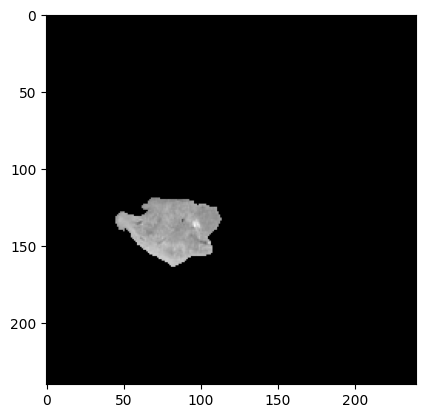

In [17]:
slice_index = find_slice_with_max_mask_area(seg_data)
cutout_t1 = t1_data[:, :, slice_index] * seg_data[:, :, slice_index]
plt.imshow(cutout_t1, cmap='gray');

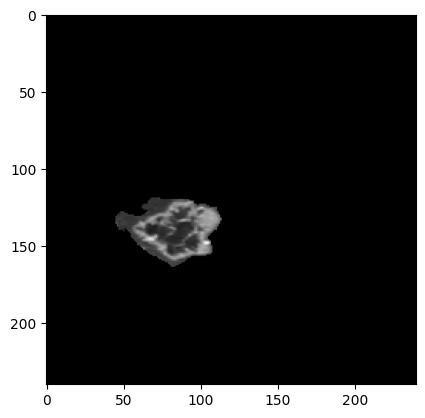

In [18]:
slice_index = find_slice_with_max_mask_area(seg_data)
cutout_t1c = t1c_data[:, :, slice_index] * seg_data[:, :, slice_index]
plt.imshow(cutout_t1c, cmap='gray');

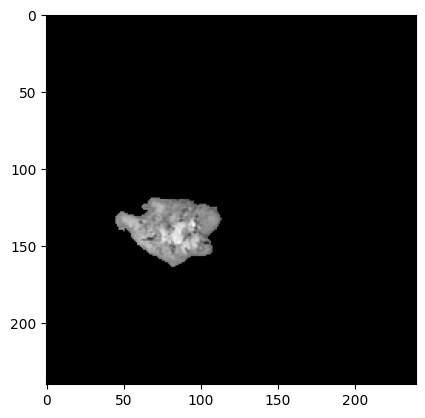

In [19]:
slice_index = find_slice_with_max_mask_area(seg_data)
cutout_flair = flair_data[:, :, slice_index] * seg_data[:, :, slice_index]
plt.imshow(cutout_flair, cmap='gray');

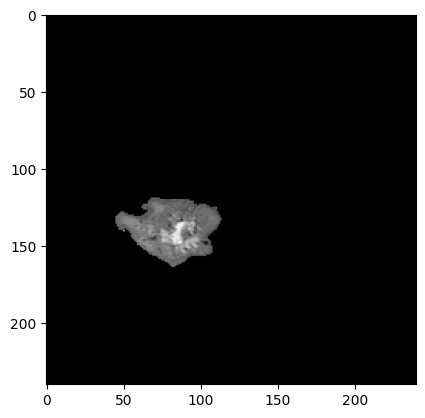

In [20]:
slice_index = find_slice_with_max_mask_area(seg_data)
cutout_t2 = t2_data[:, :, slice_index] * seg_data[:, :, slice_index]
plt.imshow(cutout_t2, cmap='gray');

## Save PNG files

In [24]:
import os
parent_folder = Path('/mnt/gs/brats-image-files-eu')

dataset_folders = os.listdir(parent_folder)

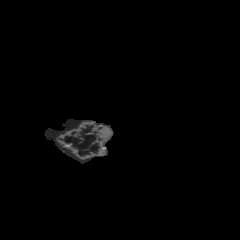

In [31]:
Image.fromarray(cutout_t1c).convert('RGB')

In [36]:
modalities = ['t1', 't2', 'flair', 't1c']
patient_folders = os.listdir(parent_folder / dataset_folders[0])
filename = Path(patient_folders[0]) / f'{patient_folders[0]}_raw_cutout_{modalities[0]}.png'
parent_folder / dataset_folders[0] / patient_folders[0] / 'png' / filename

PosixPath('/mnt/gs/brats-image-files-eu/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/png/BraTS-GLI-00000-000/BraTS-GLI-00000-000_raw_cutout_t1.png')

In [ ]:
def get_cutout(data, mask, slice_number):
  return data[:, :, slice_number] * mask[:, :, slice_number]

def png_cutout_save_path(patient_name, modality):
  return f'{patient_name}_{modality}_raw_cutout.png'

for dataset_folder in os.listdir(parent_folder):
  for patient_folder in os.listdir(parent_folder / dataset_folder):
    for patient_files in os.listdir(parent_folder / dataset_folder / patient_folder):
        full_path_patient_folder = parent_folder / dataset_folder / patient_folder
        seg_filename = f'{str(patient_folder)}-seg.nii.gz'
        t1_filename = f'{str(patient_folder)}-t1n.nii.gz'
        t1_gad_filename = f'{str(patient_folder)}-t1c.nii.gz'
        t2_filename = f'{str(patient_folder)}-t2w.nii.gz'
        flair_filename = f'{str(patient_folder)}-t2f.nii.gz'

        seg_data =    (read_nii(full_path_patient_folder / seg_filename) >=1).astype(np.uint8)
        seg_data_w_levels =    read_nii(full_path_patient_folder / seg_filename).astype(np.uint8)


        t1_data =     normalize_nii_for_pil(read_nii(full_path_patient_folder / t1_filename))
        t2_data =     normalize_nii_for_pil(read_nii(full_path_patient_folder / t2_filename))
        t1_gad_data = normalize_nii_for_pil(read_nii(full_path_patient_folder / t1_gad_filename))
        flair_data =  normalize_nii_for_pil(read_nii(full_path_patient_folder / flair_filename))

        slice_index = find_slice_with_max_mask_area(seg_data)

        flair_cutout = Image.fromarray(get_cutout(flair_data, seg_data, slice_index)).convert('RGB')
        t1_cutout = Image.fromarray(get_cutout(t1_data, seg_data, slice_index)).convert('RGB')
        t2_cutout = Image.fromarray(get_cutout(t2_data, seg_data, slice_index)).convert('RGB')
        t1_gad_cutout = Image.fromarray(get_cutout(t1_gad_data, seg_data, slice_index)).convert('RGB')

        png_save_path = full_path_patient_folder / 'png'

        flair_cutout.save(png_save_path / png_cutout_save_path(patient_folder, 'flair'))
        t1_cutout.save(png_save_path / png_cutout_save_path(patient_folder, 't1'))
        t1_gad_cutout.save(png_save_path / png_cutout_save_path(patient_folder, 't1c'))
        t2_cutout.save(png_save_path / png_cutout_save_path(patient_folder, 't2'))


In [72]:
png_save_path / png_cutout_save_path(patient_folder, 'flair')

PosixPath('/mnt/gs/brats-image-files-eu/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/png/BraTS-GLI-00000-000_flair_raw_cutout.png')

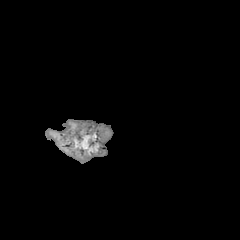

In [66]:
flair_cutout

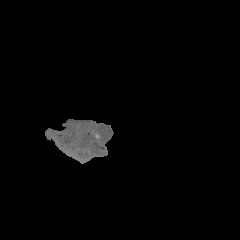

In [67]:
t1_cutout

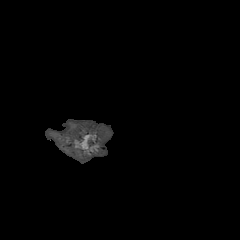

In [68]:
t2_cutout

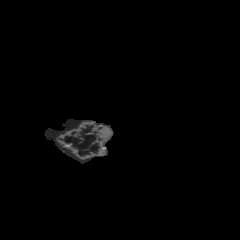

In [69]:
t1_gad_cutout